# Exploratory Data Analysis for Fire Emblem Engage
## Author: Kevin Stull
## Introduction 
In this first article, we are just going to be loading and exploring the data. I decided to make this into a guide because some of you may be interesting in data science or programming (although you certianly don't need to be). If you are not the coding type, feel free to ignore the code and just enjoy the graphs and the text that is accompanying it. You will see us using two python libraries, pandas and matplotlib. Pandas is useful because it stores our data in an organized way (called an object) and has a bunch of useful methods (pre-written functions that do useful operations like find sums or averages). Matplotlib, is a library that transfers the graphing properties of MATLAB to python, so we will use it to graph our data in a helpful way. 

## Data Loading
I added the chapter recruited data manually, so I transfer it from one csv to the other so I did not have to enter it twice. For characters recruited during a paralogue, I simply add 1 to the chapter that must be completed to unlock it. 

In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt

# load data
df_char_bases = pd.read_csv('fe_17_data_char_bases.csv')
df_char_growths = pd.read_csv('fe_17_data_char_growths.csv')
temp = pd.merge(df_char_bases, df_char_growths[['Name', 'Ch_Rec']], on='Name', how='left')
df_char_bases['Ch_Rec'] = temp['Ch_Rec'] 

## Data Example
This is an example of what some of the data looks like inside of the data frame. 

In [4]:
# Data Example 
df_char_bases.head(10)

,Name,HP,Str,Mag,Dex,Spd,Def,Res,Lck,Bld,Internal Level,Total,Total Without HP,Ch_Rec
0,Veyle,1,8,4,8,8,6,10,8,3,0,56,55,22
1,Saphir,4,3,1,10,4,7,5,8,4,19,46,42,19
2,Mauvier,7,3,6,4,3,6,6,6,1,20,42,35,21
3,Goldmary,3,3,1,5,6,3,5,5,1,17,32,29,16
4,Lindon,3,1,4,7,3,3,3,2,3,18,29,26,18
5,Merrin,3,4,2,4,1,2,2,5,1,15,24,21,13
6,Kagetsu,3,5,1,3,1,2,2,5,1,15,23,20,11
7,Ivy,3,2,4,7,3,1,1,1,0,0,22,19,11
8,Panette,3,3,1,5,2,2,2,5,-1,15,22,19,13
9,Zelkov,3,4,1,3,3,2,1,1,3,0,21,18,11


## Exploration of Bases 
### plot hp growth by character
Here is a simple example of what we can do. Let's just plot the HP growths for each character. 

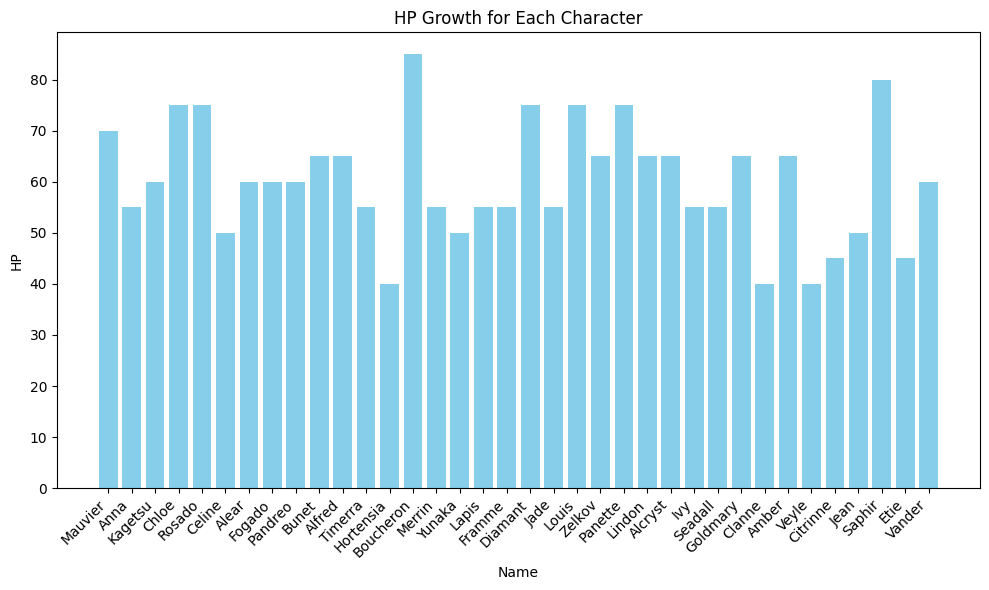

In [3]:
plt.figure(figsize=(10, 6))
plt.bar(df_char_growths['Name'], df_char_growths['HP'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('HP')
plt.title('HP Growth for Each Character')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot Total Basses without HP 
We can also look at the bases and sort the list to get an idea of what the best and worst characters are for each stat. 

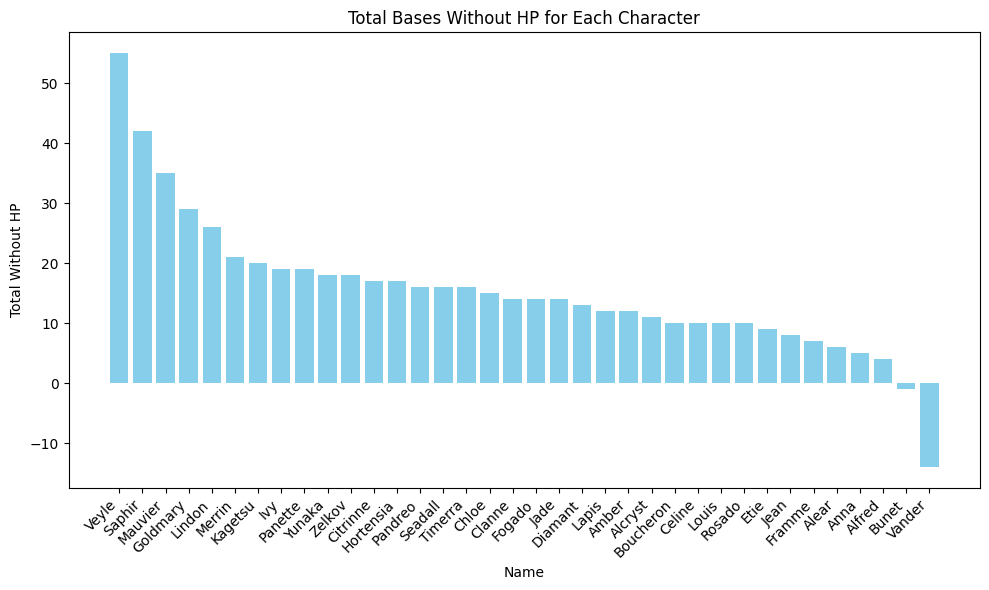

In [4]:
# Sort the DataFrame by 'Adjusted_Totals' in descending order
df_char_bases = df_char_bases.sort_values(by='Total Without HP', ascending=False)
# example: plot base totals for each character 
plt.figure(figsize=(10, 6))
plt.bar(df_char_bases['Name'], df_char_bases['Total Without HP'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Total Without HP')
plt.title('Total Bases Without HP for Each Character')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Adjusted plot of Character Bases
We can do more complicated comparisons if we want. For example, here is a weighted sum where high luck is penalized highly and HP is worth a bit less. 

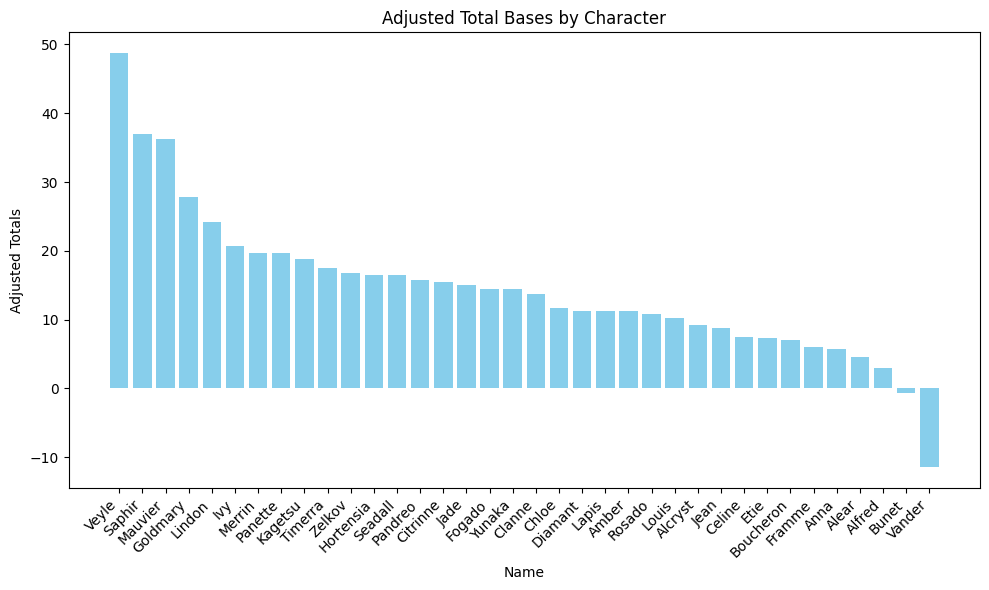

In [5]:
# define a new test metric
df_char_bases['Adjusted_Totals'] = (
    df_char_bases['Str'] +
    df_char_bases['Mag'] +
    df_char_bases['Dex'] +
    df_char_bases['Spd'] +
    df_char_bases['Def'] +
    df_char_bases['Res'] +
    0.5 * df_char_bases['Lck'] +
    0.75 * df_char_bases['HP']
)

# Sort the DataFrame by 'Adjusted_Totals' in descending order
df_char_bases = df_char_bases.sort_values(by='Adjusted_Totals', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_char_bases['Name'], df_char_bases['Adjusted_Totals'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Adjusted Totals')
plt.title('Adjusted Total Bases by Character')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Exploration of Growths 
### Total Growths

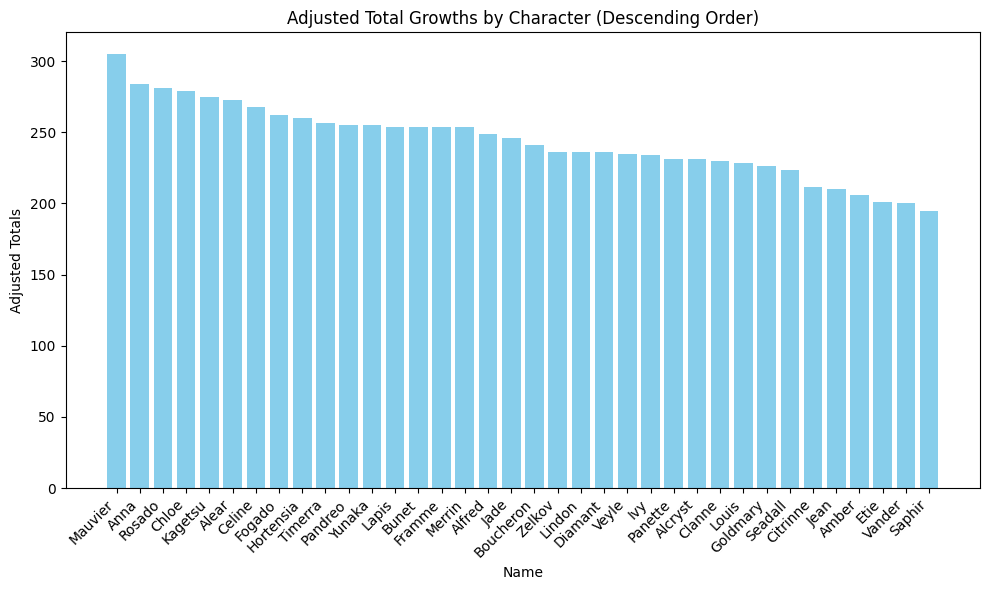

In [6]:
# Define the new column based on the specified conditions for df_char_growths
df_char_growths['Adjusted_Totals'] = (
    df_char_growths['Str'] +
    df_char_growths['Mag'] +
    df_char_growths['Dex'] +
    df_char_growths['Spd'] +
    df_char_growths['Def'] +
    df_char_growths['Res'] +
    0.5 * df_char_growths['Lck'] +
    0.75 * df_char_growths['HP']
)

# Sort the DataFrame by 'Adjusted_Totals' in descending order
df_char_growths_sorted = df_char_growths.sort_values(by='Adjusted_Totals', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_char_growths_sorted['Name'], df_char_growths_sorted['Adjusted_Totals'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Adjusted Totals')
plt.title('Adjusted Total Growths by Character (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

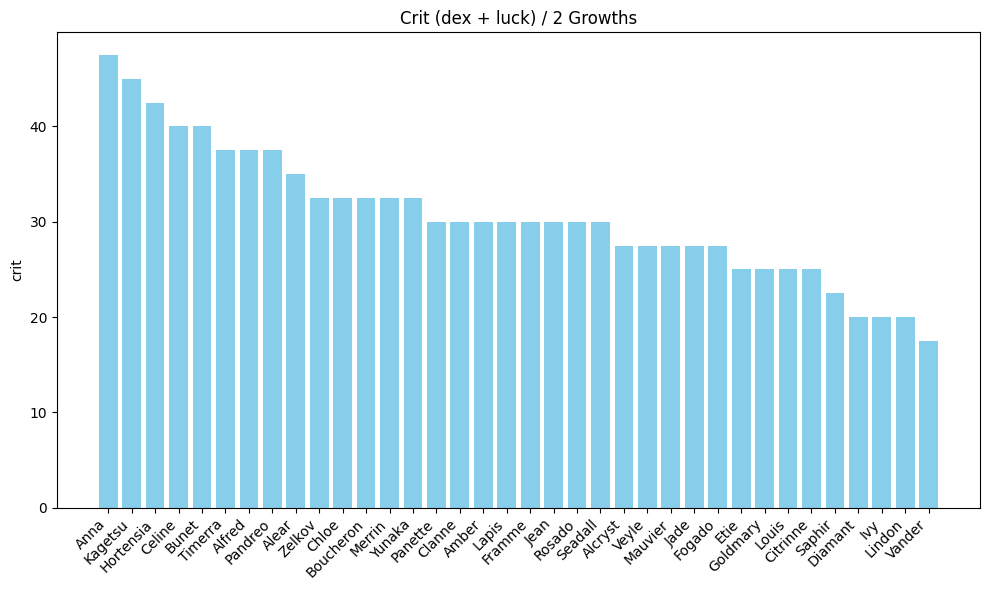

In [7]:
# Name,HP,Str,Mag,Dex,Spd,Def,Res,Lck,Bld,Total
df_char_growths['crit'] = (
    df_char_growths['Dex'] + 
    df_char_growths['Lck']
) / 2

df_char_growths = df_char_growths.sort_values(by='crit', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_char_growths['Name'], df_char_growths['crit'], color='skyblue')
plt.ylabel('crit')
plt.title('Crit (dex + luck) / 2 Growths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Specific Explorations
### Best Tank 
Let's look at tanking, a good tank needs high HP, Def, and Res. Ideally, they would also have speed to avoid getting doubled but let's look at both cases. 

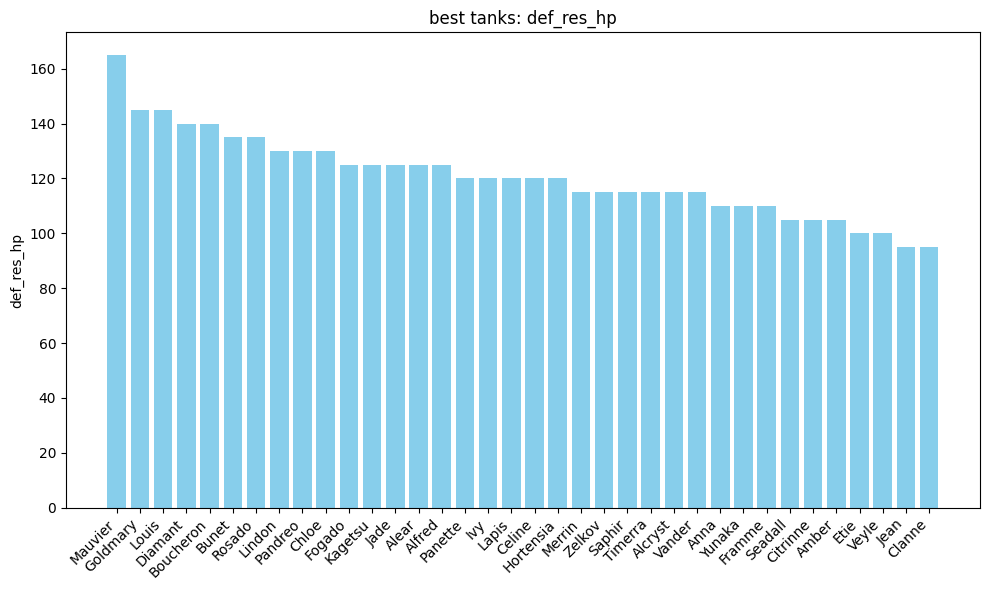

In [8]:
# Define the new column based on the specified conditions for df_char_growths
df_char_growths['def_res_hp'] = (
    df_char_growths['Def'] +
    df_char_growths['Res'] +
    df_char_growths['HP']
)
df_char_growths = df_char_growths.sort_values(by='def_res_hp', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_char_growths['Name'], df_char_growths['def_res_hp'], color='skyblue')
plt.ylabel('def_res_hp')
plt.title('best tanks: def_res_hp')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### More complicated visulatization
ChatGPT is great for generating these more complicated plots. It got most of the way there but it needed help rescaling the plots back from their normalized form. 

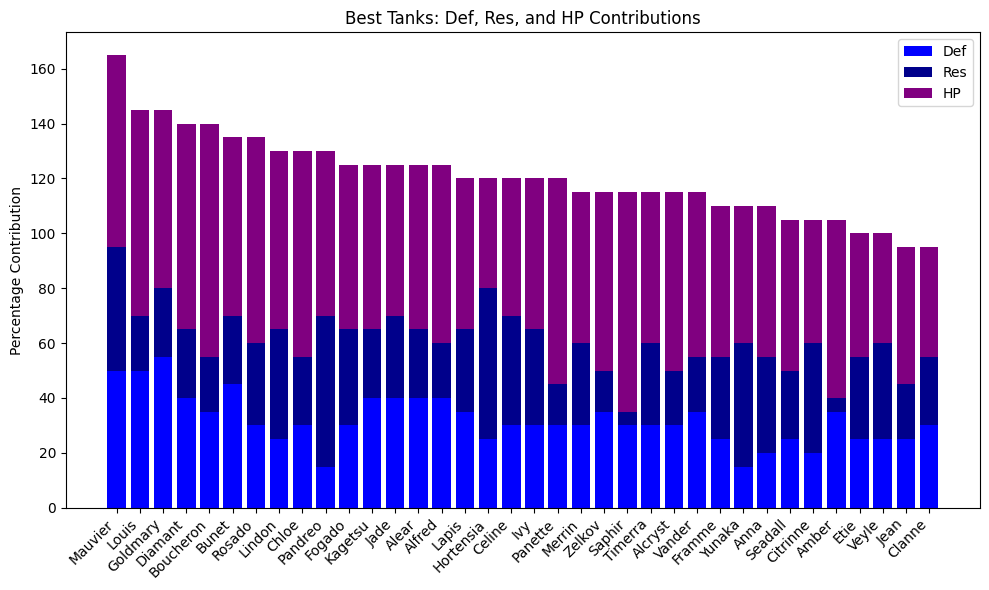

In [9]:
# generated with help from ChatGPT 

# Define the new column based on the specified conditions for df_char_growths
df_char_growths['def_res_hp'] = (
    df_char_growths['Def'] +
    df_char_growths['Res'] +
    df_char_growths['HP']
)

# Calculate the percentage contribution of each stat
df_char_growths['def_percentage'] = (df_char_growths['Def'] / df_char_growths['def_res_hp'])
df_char_growths['res_percentage'] = (df_char_growths['Res'] / df_char_growths['def_res_hp'])
df_char_growths['hp_percentage'] = (df_char_growths['HP'] / df_char_growths['def_res_hp']) 

# Sort the DataFrame by 'def_res_hp' in descending order
df_char_growths = df_char_growths.sort_values(by='def_res_hp', ascending=False)

temp = df_char_growths['def_res_hp']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_char_growths['Name'], df_char_growths['def_percentage'] * temp, color='blue', label='Def', bottom=0)
plt.bar(df_char_growths['Name'], df_char_growths['res_percentage'] * temp, color='darkblue', label='Res', bottom=df_char_growths['def_percentage'] * temp)
plt.bar(df_char_growths['Name'], df_char_growths['hp_percentage'] * temp, color='purple', label='HP', bottom=(df_char_growths['def_percentage'] + df_char_growths['res_percentage'])*temp)
plt.ylabel('Percentage Contribution')
plt.title('Best Tanks: Def, Res, and HP Contributions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



### Introducing Normalization
Earlier we introduced a weighted sum to downweight the value of HP. This is because HP varies by a larger amount from character to character than other stats. This is probably true to a lesser extent with many of the stats. To treat each stat equally we are going to introduce data normalization. The formulu will be given below for those interested but basically takes the data and squeezes it to be proportionally spaced between 0 and 1, that way the "max hp" = 'max luck' = 1 and "min hp" = 'min luck' = 0. This is called 'min-max' scaling and is among the simplest forms of data normalization, sci-kit-learn has a nice pre-built implementation we can use. 

$$
stat_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['HP','Str','Mag','Dex','Spd','Def','Res','Lck','Bld']

df_char_growths_norm = scaler.fit_transform(df_char_growths[features])
df_char_bases_norm = scaler.fit_transform(df_char_bases[features])

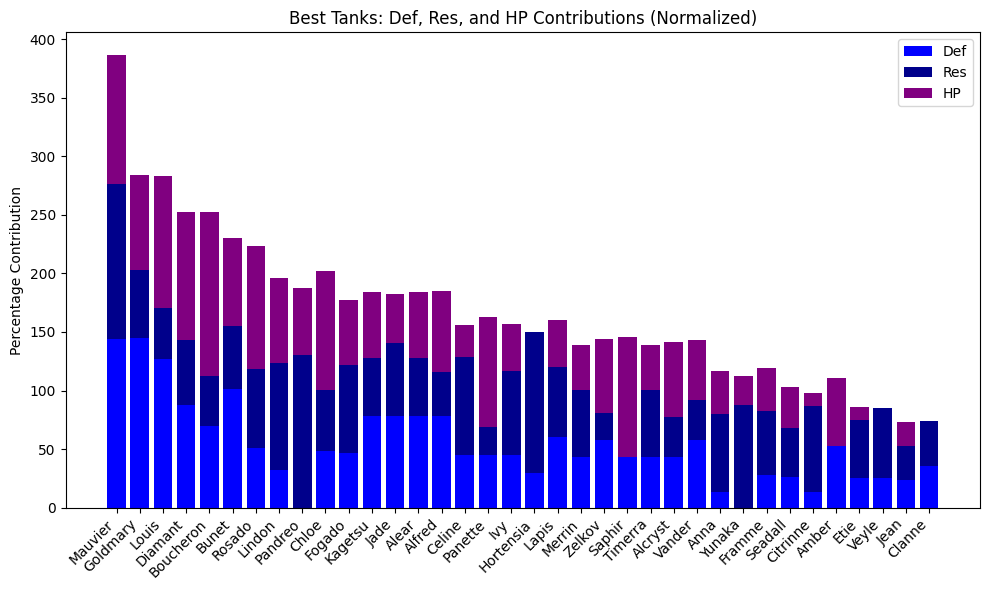

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_char_growths is your DataFrame with 'Name', 'HP', 'Def', 'Res' columns

# Define the new column based on the specified conditions for df_char_growths
df_char_growths['def_res_hp'] = (
    df_char_growths['Def'] +
    df_char_growths['Res'] +
    df_char_growths['HP']
)

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['Def', 'Res', 'HP']  # Replace with your actual column names

# Apply Min-Max scaling to the selected columns
df_char_growths_norm = df_char_growths.copy()
df_char_growths_norm[columns_to_normalize] = scaler.fit_transform(df_char_growths_norm[columns_to_normalize])

# Calculate the percentage contribution of each stat based on the normalized values
df_char_growths_norm['def_percentage'] = df_char_growths_norm['Def'] 
df_char_growths_norm['res_percentage'] = df_char_growths_norm['Res']
df_char_growths_norm['hp_percentage'] = df_char_growths_norm['HP']

# Sort the DataFrame by 'def_res_hp' in descending order
df_char_growths_norm = df_char_growths_norm.sort_values(by='def_res_hp', ascending=False)

temp = df_char_growths_norm['def_res_hp']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_char_growths_norm['Name'], df_char_growths_norm['def_percentage'] * temp, color='blue', label='Def', bottom=0)
plt.bar(df_char_growths_norm['Name'], df_char_growths_norm['res_percentage'] * temp, color='darkblue', label='Res', bottom=df_char_growths_norm['def_percentage'] * temp)
plt.bar(df_char_growths_norm['Name'], df_char_growths_norm['hp_percentage'] * temp, color='purple', label='HP', bottom=(df_char_growths_norm['def_percentage'] + df_char_growths_norm['res_percentage']) * temp)
plt.ylabel('Percentage Contribution')
plt.title('Best Tanks: Def, Res, and HP Contributions (Normalized)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Normalized Growths
The same for normalized growths.  

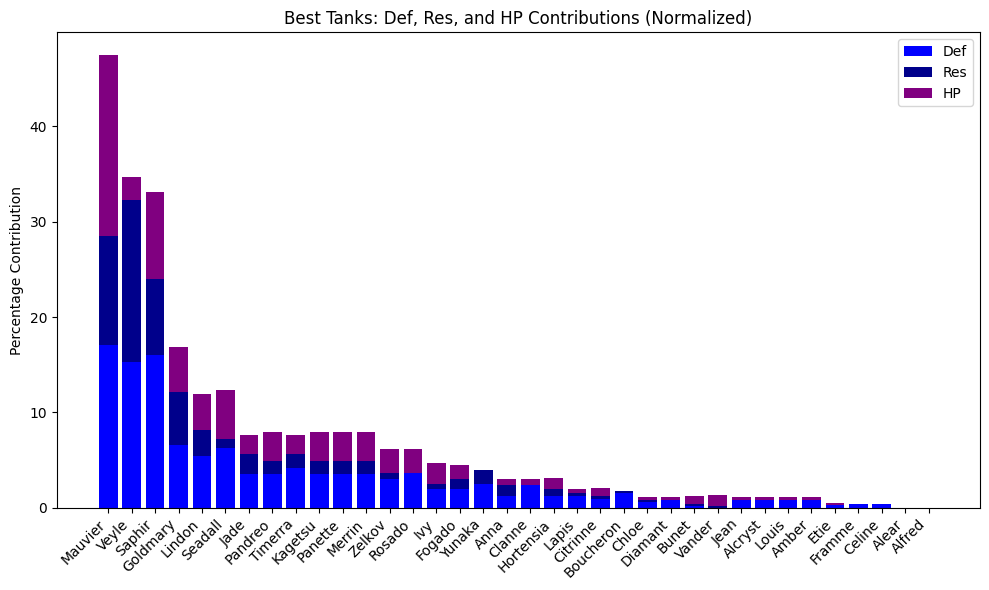

In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_char_bases is your DataFrame with 'Name', 'HP', 'Def', 'Res' columns

# Define the new column based on the specified conditions for df_char_bases
df_char_bases['def_res_hp'] = (
    df_char_bases['Def'] +
    df_char_bases['Res'] +
    df_char_bases['HP']
)

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['Def', 'Res', 'HP']  # Replace with your actual column names

# Apply Min-Max scaling to the selected columns
df_char_bases_norm = df_char_bases.copy()
df_char_bases_norm[columns_to_normalize] = scaler.fit_transform(df_char_bases_norm[columns_to_normalize])

# Calculate the percentage contribution of each stat based on the normalized values
df_char_bases_norm['def_percentage'] = df_char_bases_norm['Def']
df_char_bases_norm['res_percentage'] = df_char_bases_norm['Res'] 
df_char_bases_norm['hp_percentage'] = df_char_bases_norm['HP']

# Sort the DataFrame by 'def_res_hp' in descending order
df_char_bases_norm = df_char_bases_norm.sort_values(by='def_res_hp', ascending=False)

temp = df_char_bases_norm['def_res_hp']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_char_bases_norm['Name'], df_char_bases_norm['def_percentage'] * temp, color='blue', label='Def', bottom=0)
plt.bar(df_char_bases_norm['Name'], df_char_bases_norm['res_percentage'] * temp, color='darkblue', label='Res', bottom=df_char_bases_norm['def_percentage'] * temp)
plt.bar(df_char_bases_norm['Name'], df_char_bases_norm['hp_percentage'] * temp, color='purple', label='HP', bottom=(df_char_bases_norm['def_percentage'] + df_char_bases_norm['res_percentage']) * temp)
plt.ylabel('Percentage Contribution')
plt.title('Best Tanks: Def, Res, and HP Contributions (Normalized)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## Notes
### What makes a good unit
- it is no secret that community raves over Anna and Kagetsu, they are leaders in terms of the crit stat I defined 
- since this stat is important in determining hit rate and rate of ability proccs, its not suprising that these units are the highest 
- this is one possible way to determine a good offensive unit

### Tier List 
- S: Kagetsu, Anna (magic)
- A: Hortensia, Timerra (sandstorm), celine (ignis)
- B: Alear, Chloe, Alfred (golden lotus)
- C: pandreo 

### Other
- Bunet is the unit that could have been (if not for those negative bases)
- crazy numbers on Mauvier, but bad crit also held back by hidden level 
- celine and timerra very good at proccing sandstorm and ignis 
- you could argue that B == A when accounting for availability
- pandreo being a pre-promote is penalized
- make sure to switch anna to magic 
- str/mag split hurts Alear (but not celine b/c ignis with high crit)

### Team Idea
- Anna: crit mage (abuses make a killing)
- Katgetsu: general pair with sigured 
- Hortensia: might be more useful as a sage (help her low mag growth) or wrath + vantage + miciah
- Timerra: use her unique class + ike for off-tanking (ike ult can proc sandstorm)
- Alear: griffin knight dodge tank with marth and convoy gives access to all staves <= b
- Chloe: wyvern rider pair with roy or other high str emblem/ skill
- Alfred: str based crit build b/c of high luck maybe heavy hitter or reprisal 
- Pandreo: full utility, give lucina for perfect dual guard / hex for debuffs on attacks 